# Spectrometer test


In [13]:
# import seabreeze (use 'pyseabreeze')
import seabreeze.spectrometers as sb

import os
import math
import numpy as np
import matplotlib.pyplot as plt
import time

# set graphics to be plotted in the notebook
%matplotlib inline 

devices = sb.list_devices()
print (devices)

[<SeaBreezeDevice STS:S03615>]


In [2]:
#spec = sb.Spectrometer(devices[0])#universal
#spec = sb.Spectrometer.from_serial_number("USB2+F02461")#usb 2000
spec = sb.Spectrometer.from_serial_number("S03615")#STS-UV-L-100-400-SMA

In [3]:
# serial number
print (spec.serial_number)
# model
print (spec.model)
# number of pixels (as returned by seabreeze)
print (spec.pixels)
# set the integration time in microseconds
spec.integration_time_micros(400000)
time.sleep(2)
# return an array containing all wavelengths
#wavelengths=spec.wavelengths()
# return the newest aquired spectrum (with dark count and nonlinearity correction)
#intensities=spec.intensities(correct_dark_counts=True, correct_nonlinearity=True)

S03615
STS
1024


In [10]:
spec.integration_time_micros()

<bound method Spectrometer.integration_time_micros of <Spectrometer STS:S03615>>

665.6025696758672 182.79051208496094


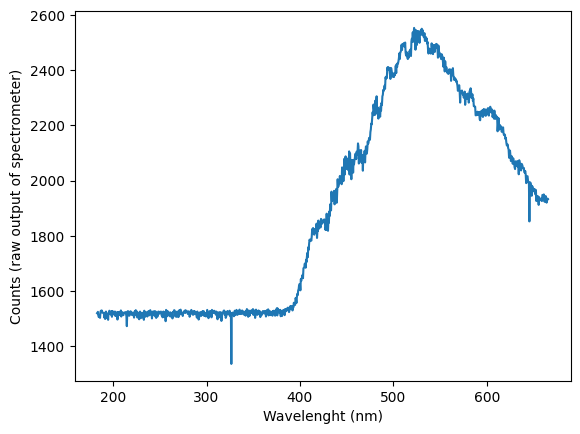

In [12]:
#set integration time
micro_time=500000# us
spec.integration_time_micros(micro_time)
#spectrometer test
trial_num=1
trials=[]
for i_num in range(trial_num):
    wavelengths, intensities = spec.spectrum() # core function
    trials.append(intensities)
intensities=np.mean(trials,axis=0)
#
plt.plot(wavelengths,intensities)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
print (np.max(wavelengths),np.min(wavelengths))
# wavelengths, intensities = spec.spectrum()
# print (len(wavelengths))
# print (len(intensities))
# plt.plot(wavelengths,intensities)
# plt.xlabel ("Wavelenght (nm)")
# plt.ylabel("Counts (raw output of spectrometer)")
# plt.grid()

1024
1024


2517.0

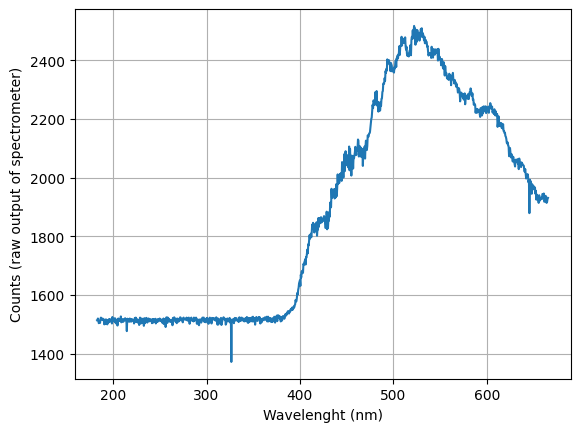

In [4]:
wavelengths, intensities = spec.spectrum()
print (len(wavelengths))
print (len(intensities))
plt.plot(wavelengths,intensities)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()
np.max(intensities)
#plt.savefig('tree100ms6.tiff')

In [24]:
print (wavelengths[np.argmax(intensities)])

522.2660392022713


In [25]:
#get blue 430nm led spectrum
blue_430nm_400ms=intensities
blue_430nm_400ms=[]
for ii in range(10):
    wavelengths, intensities = spec.spectrum()
    blue_430nm_400ms.append(intensities)
    time.sleep(2)
blue_430nm_400ms=np.asarray(blue_430nm_400ms)
mean_blue_430nm_400ms=np.mean(blue_430nm_400ms,axis=0)
plt.plot(wavelengths,mean_blue_430nm_400ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

KeyboardInterrupt: 

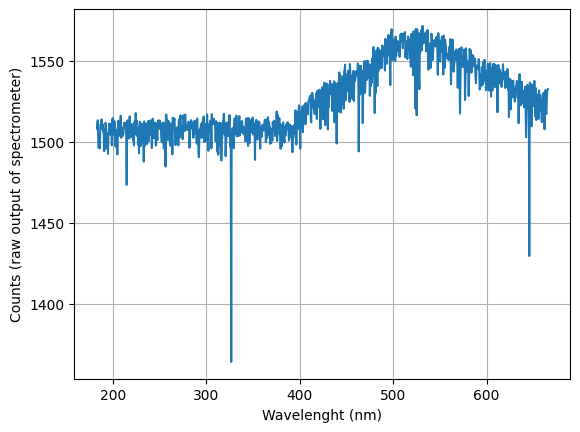

In [19]:
#get dark noise
dark_400ms_10=[]
for ii in range(10):
    wavelengths, intensities = spec.spectrum()
    dark_400ms_10.append(intensities)
    time.sleep(2)
dark_400ms_10=np.asarray(dark_400ms_10)
mean_dark_400ms_newDev2=np.mean(dark_400ms_10,axis=0)
plt.plot(wavelengths,mean_dark_400ms_newDev2)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

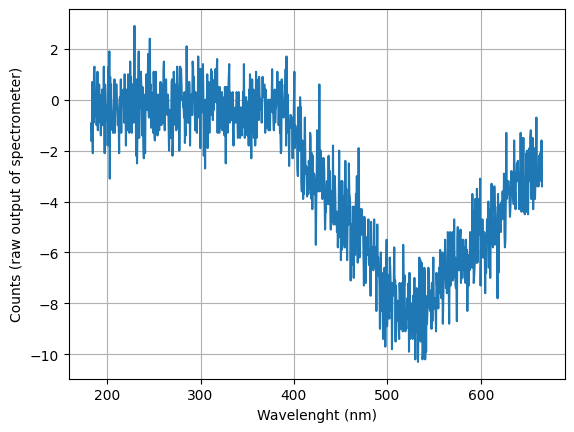

In [11]:
#blue 430nm 400ms exclude dark noise
blue_430nm_400ms_no_dark_noise=mean_blue_430nm_400ms-mean_dark_400ms_newDev2
plt.plot(wavelengths,blue_430nm_400ms_no_dark_noise)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

In [12]:
wavelengths[np.argmax(blue_430nm_400ms_no_dark_noise)]

229.2387314773166

In [13]:
read_dictionary = np.load('my_dict_calib_STSUV_new2.npy').item()
#print(read_dictionary.items())

FileNotFoundError: [Errno 2] No such file or directory: 'my_dict_calib_STSUV_new2.npy'

In [ ]:
#add new data for new device and save in new file
read_dictionary['blue_430nm_400ms_no_dark_noise']=blue_430nm_400ms_no_dark_noise
#np.save('my_dict_calib_STSUV_new2.npy', read_dictionary) 

In [ ]:
read_dictionary = np.load('my_dict_calib_STSUV_new2.npy').item()
plt.plot(read_dictionary['wavelengths_UV'],read_dictionary['blue_430nm_400ms_no_dark_noise'])
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")